# TFUG珠海 TensorFlow-all-around 活动 code-lab
[关于 TFUG珠海 . TFUG Livin ZhuHai Life;-)](http://zh.tfug.world/about/)

活动: [TensorFlow All\-Around 珠海 \| Meetup](https://www.meetup.com/TensorFlow-User-Group-Zhuhai/events/264053619/)

## 目标
通过最基本入门任务, 来展示基本 ML 处理过程:

- 数据整理
- 模型定义
- 训练模型
- 检验模型

以便激发大家学习兴趣, 合理理解 AI 实现, 正确结合业务推动项目落地.

## 纲要
> 毕竟大妈也嗯哼过几年编程, 所以,在此 笔记之外有很多准备, 并没逐一展示, 特此提示

- 用 Python 3
- 基于 miniconda3 进行运行时版本环境构造
- 配置使用 aliyun 的 PyPi 仓库加速模块安装
- 先通过脚本原型完成所有代码的探索, 再整理为 ipynb 思考过程记述


# Keras 用 TensorFlow 识别手写数字

> 基于标准 MNSIT 数据集


In [5]:
# fix a random seed for reproducibility
# 注意,这里调节 np 的随机核, 必须在加载 keras 系列模块前先导入, 否则....
import numpy as np
#np.random.seed(123)
np.random.seed(9)

In [19]:
# 加载一系列依赖模块
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.models import save_model,load_model
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten, Activation
from keras.layers.core import Dense, Activation, Dropout
from keras.callbacks import TensorBoard

from keras.utils import plot_model
from keras.utils import np_utils


In [20]:
# 各种基本参数
# 训练次数...为节约时间, 可以调低
#nb_epoch = 25
nb_epoch = 12

num_classes = 10
batch_size = 128
train_size = 60000
test_size = 10000

# 横向长度...图片压缩目标
v_length = 784


> 技巧:

官方各种代码都是通过 `mnist.load_data()` 试图自动下载:
https://s3.amazonaws.com/img-datasets/mnist.npz

可惜是的, 这儿距离中国太远, 下载速度非常感人, 只能用其它技术手段先下载到本地,
以便 Jupyter 可以从本地加载,

大家在运行时, 请:

- 先下载:[mnist.npz](http://ipynb.zoomquiet.top/data/mnist.npz)
- 放到 jupyter notebook 运行目录中

- 和 `tfug-zh-dama-keras-demo-handwritten-digit-recognition.ipynb` 同一层目录

即可;-)

In [21]:
# 基于事先下载的 .npz 数据集,改写官方数据加载函式,变成自己的本地加载函式
def locload_data(path='mnist.npz'):
    f = np.load(path)
    x_train, y_train = f['x_train'], f['y_train']
    x_test, y_test = f['x_test'], f['y_test']
    f.close()
    return (x_train, y_train), (x_test, y_test)

# 将数据读入
(x_train, y_train), (x_test, y_test) = locload_data()
# split the mnist data into train and test
#(trainData, trainLabels), (testData, testLabels) = mnist.load_data()
(trainData, trainLabels), (testData, testLabels) = locload_data()



## 检验加载数据维度

In [22]:
#print("训练数据集:\n", x_train.shape,y_train.shape,"\n测试数据集:\n",x_test.shape,y_test.shape)
print("[INFO] train data shape: {}".format(trainData.shape))
print("[INFO] test data shape: {}".format(testData.shape))
print("[INFO] train samples: {}".format(trainData.shape[0]))
print("[INFO] test samples: {}".format(testData.shape[0]))


[INFO] train data shape: (60000, 28, 28)
[INFO] test data shape: (10000, 28, 28)
[INFO] train samples: 60000
[INFO] test samples: 10000


6 0 4 1


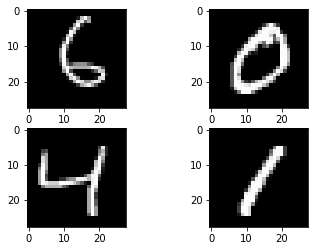

In [23]:
import matplotlib.pyplot as plt

# 训练数据集抽查, plot 4 images as gray scale
plt.subplot(221)
print(y_train[4546],y_train[1],y_train[2],y_train[3])
plt.imshow(x_train[4546], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

##  格式化数据集

In [24]:
# reshape the dataset
trainData = trainData.reshape(train_size, v_length)
testData = testData.reshape(test_size, v_length)
trainData = trainData.astype("float32")
testData = testData.astype("float32")
trainData /= 255
testData /= 255

print("[INFO] train data shape: {}".format(trainData.shape))
print("[INFO] test data shape: {}".format(testData.shape))
print("[INFO] train samples: {}".format(trainData.shape[0]))
print("[INFO] test samples: {}".format(testData.shape[0]))


[INFO] train data shape: (60000, 784)
[INFO] test data shape: (10000, 784)
[INFO] train samples: 60000
[INFO] test samples: 10000


In [25]:
# convert class vectors to binary class matrices --> one-hot encoding
mTrainLabels = np_utils.to_categorical(trainLabels, num_classes)
mTestLabels = np_utils.to_categorical(testLabels, num_classes)

## 构造模型


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
____

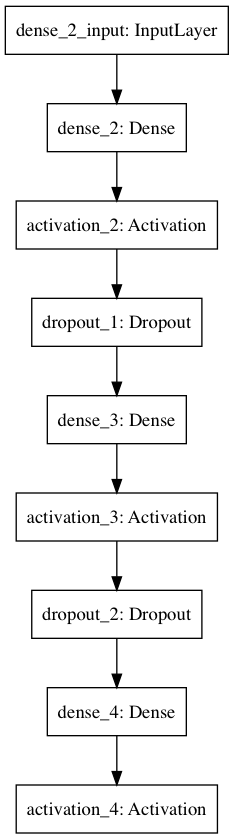

In [26]:
# create the model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(num_classes))
model.add(Activation("softmax"))

# summarize the model
model.summary()

# 保存模型(拓扑图)
plot_model(model, to_file='mlp.png')


## 训练并检验模式

In [27]:
# compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# fit the model
history = model.fit(trainData, mTrainLabels
                    , validation_data = (testData, mTestLabels)
                    , batch_size = batch_size
                    #, nb_epoch=nb_epoch
                    , epochs = nb_epoch
                    , verbose = 2)




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
 - 6s - loss: 0.2688 - acc: 0.9200 - val_loss: 0.1058 - val_acc: 0.9669
Epoch 2/12
 - 5s - loss: 0.1101 - acc: 0.9668 - val_loss: 0.0921 - val_acc: 0.9717
Epoch 3/12
 - 5s - loss: 0.0771 - acc: 0.9760 - val_loss: 0.0697 - val_acc: 0.9789
Epoch 4/12
 - 7s - loss: 0.0604 - acc: 0.9803 - val_loss: 0.0717 - val_acc: 0.9777
Epoch 5/12
 - 6s - loss: 0.0480 - acc: 0.9843 - val_loss: 0.0664 - val_acc: 0.9804
Epoch 6/12
 - 5s - loss: 0.0435 - acc: 0.9858 - val_loss: 0.0703 - val_acc: 0.9808
Epoch 7/12
 - 6s - loss: 0.0361 - acc: 0.9877 - val_loss: 0.0711 - val_acc: 0.9799
Epoch 8/12
 - 6s - loss: 0.0313 - acc: 0.9892 - val_loss: 0.0675 - val_acc: 0.9791
Epoch 9/12
 - 5s - loss: 0.0272 - acc: 0.9909 - val_loss: 0.0558 - val_acc: 0.9852
Epoch 10/12
 - 6s - loss: 0.0266 - acc: 0.9911 - val_loss: 0.0705 - val_acc: 0.9807
Epoch 11/12
 - 5s - los

> Epoch 3/12
 - 5s - loss: 0.0771 - acc: 0.9760 - val_loss: 0.0697 - val_acc: 0.9789
 
 意思是:
 
 - 第三轮 Epoch
 - 用 5秒完成
 - 获得精确度 97.6%
 - 错误率: 0.2% 左右

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


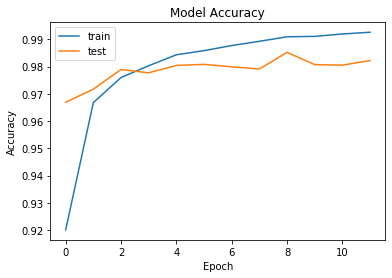

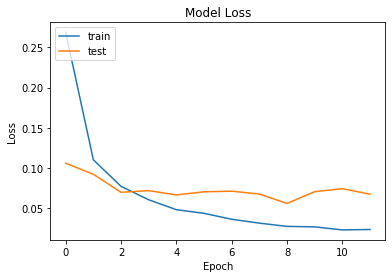

[INFO] test score - 0.06735334231600937
[INFO] test accuracy - 0.9822


In [28]:
# print the history keys
print(history.history.keys())

# evaluate the model
scores = model.evaluate(testData, mTestLabels, verbose=0)

# history plot for accuracy
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "test"], loc="upper left")
plt.show()

# history plot for accuracy
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "test"], loc="upper left")
plt.show()

# print the results
print("[INFO] test score - {}".format(scores[0]))
print("[INFO] test accuracy - {}".format(scores[1]))


> 模型最关键效能指数

- Accuracy ~ 精准度, 仅仅通过12次训练, 就获得 98.35% 的精确度
- Loss ~ 错误率, 而对测试集的错误,也稳定在 0.6% 左右

## 检验模型
> 尝试对训练出来的成果进行可视化检验

In [29]:
# 测试目标数据集体量
print(testData.shape)

(10000, 784)


In [30]:
# 尝试用随机模块来生成随机数, 从目标数据集中指定图片来检验

import random
selected_index = random.sample(range(len(testData)), k=10)
print("随机位置:",selected_index)

随机位置: [1996, 2052, 2916, 9987, 6429, 5431, 3588, 7588, 9953, 6433]


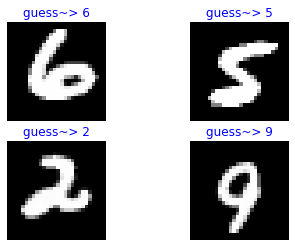

In [34]:
import random
selected_index = random.sample(range(len(testData)), k=10)
# grab some test images from the test data
test_images = testData[selected_index[0]:selected_index[0]+4]

# reshape the test images to standard 28x28 format
test_images = test_images.reshape(test_images.shape[0], 28, 28)
#print("[INFO] test images shape - {}".format(test_images.shape))
# loop over each of the test images
for i, test_image in enumerate(test_images, start=1):
    # grab a copy of test image for viewing
    org_image = test_image

    # reshape the test image to [1x784] format so that our model understands
    test_image = test_image.reshape(1,784)
    
    # make prediction on test image using our trained model
    prediction = model.predict_classes(test_image, verbose=0)

    # display the prediction and image
    #print("[INFO] I think the digit is - {}".format(prediction[0]))
    plt.subplot(220+i)
    plt.axis('off')
    plt.title("guess~> %s"%prediction[0], color='blue')
    plt.imshow(org_image, cmap=plt.get_cmap('gray'))

plt.show()

> 结果出来了:

随机选择的4张照片, 由模型猜测手写数字是几?
基本都对 ;-)

# refer.

- [面向机器学习初学者的 MNIST 初级教程](http://tensorfly.cn/tfdoc/tutorials/mnist_beginners.html)
- [Handwritten Digit Recognition using Deep Learning, Keras and Python – Gogul Ilango](https://gogul09.github.io/software/digits-recognition-mlp)
    + [Dwijraj/Hand-Written-Digit-Recognition: This is a repository with various classifier written in jupyter notebook that works on hand written digits images.](https://github.com/Dwijraj/Hand-Written-Digit-Recognition)
    + [keras/mnist_cnn.py at master · keras-team/keras](https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py)
    + [kerasのmnistのサンプルを読んでみる - Qiita](https://qiita.com/ash8h/items/29e24fc617b832fba136)
- [基于Keras+CNN的MNIST数据集手写数字分类 - 简书](https://www.jianshu.com/p/3a8b310227e6)
    + [Keras_mnist学习 - 简书](https://www.jianshu.com/p/769fb8d6cab0)
    + [keras实现mnist数据集手写数字识别 - 胡卫雄 - 博客园](https://www.cnblogs.com/ncuhwxiong/p/9774515.html)
    + [深度学习：基于keras的mnist手写数字识别 | AI柠檬](https://blog.ailemon.me/2018/05/11/deep-learning-mnist-handwritten-digit-recognition-by-keras/)
- ...


## env.
> 嗯哼一下, 大妈演示时用的环境, 大家可以根据自己的情况配置合适的...

```

༄  screenfetch

                 -/+:.          zoomq@ZQ160626rMBP
                :++++.          OS: 64bit Mac OS X 10.12.6 16G2128
               /+++/.           Kernel: x86_64 Darwin 16.7.0
       .:-::- .+/:-``.::-       Uptime: 1d 14h 51m
    .:/++++++/::::/++++++/:`    Packages: 235
  .:///////////////////////:`   Shell: bash
  ////////////////////////`     Resolution: 2560x1600
 -+++++++++++++++++++++++`      DE: Aqua
 /++++++++++++++++++++++/       WM: Quartz Compositor
 /sssssssssssssssssssssss.      WM Theme: Blue
 :ssssssssssssssssssssssss-     CPU: Intel Core i7-5557U @ 3.10GHz
  osssssssssssssssssssssssso/`  GPU: Intel Iris Graphics 6100
  `syyyyyyyyyyyyyyyyyyyyyyyy+`  RAM: 8996MiB / 16384MiB
   `ossssssssssssssssssssss/
     :ooooooooooooooooooo+.
      `:+oo+/:-..-:/+o+/-



༄  conda info

     active environment : keras
    active env location : /Users/zoomq/miniconda3/envs/keras
            shell level : 1
       user config file : /Users/zoomq/.condarc
 populated config files : /Users/zoomq/.condarc
          conda version : 4.6.14
    conda-build version : not installed
         python version : 3.7.3.final.0
       base environment : /Users/zoomq/miniconda3  (writable)
           channel URLs : https://repo.anaconda.com/pkgs/main/osx-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/free/osx-64
                          https://repo.anaconda.com/pkgs/free/noarch
                          https://repo.anaconda.com/pkgs/r/osx-64
                          https://repo.anaconda.com/pkgs/r/noarch
          package cache : /Users/zoomq/miniconda3/pkgs
                          /Users/zoomq/.conda/pkgs
       envs directories : /Users/zoomq/miniconda3/envs
                          /Users/zoomq/.conda/envs
               platform : osx-64
             user-agent : conda/4.6.14 requests/2.21.0 CPython/3.7.3 Darwin/16.7.0 OSX/10.12.6
                UID:GID : 501:20
             netrc file : /Users/zoomq/.netrc
           offline mode : False
           


༄  conda list
# packages in environment at /Users/zoomq/miniconda3/envs/keras:
#
# Name                    Version                   Build  Channel
absl-py                   0.8.0                    pypi_0    pypi
appnope                   0.1.0                    pypi_0    pypi
asn1crypto                0.24.0                   py37_0
astor                     0.8.0                    pypi_0    pypi
attrs                     19.1.0                   pypi_0    pypi
backcall                  0.1.0                    pypi_0    pypi
bleach                    3.1.0                    pypi_0    pypi
ca-certificates           2019.5.15                     1
certifi                   2019.6.16                py37_1
cffi                      1.12.3           py37hb5b8e2f_0
chardet                   3.0.4                 py37_1003
cryptography              2.7              py37ha12b0ac_0
cycler                    0.10.0                   pypi_0    pypi
decorator                 4.4.0                    pypi_0    pypi
defusedxml                0.6.0                    pypi_0    pypi
entrypoints               0.3                      pypi_0    pypi
gast                      0.2.2                    pypi_0    pypi
google-pasta              0.1.7                    pypi_0    pypi
grpcio                    1.23.0                   pypi_0    pypi
h5py                      2.9.0                    pypi_0    pypi
idna                      2.8                      py37_0
ipykernel                 5.1.2                    pypi_0    pypi
ipython                   7.8.0                    pypi_0    pypi
ipython-genutils          0.2.0                    pypi_0    pypi
ipywidgets                7.5.1                    pypi_0    pypi
jedi                      0.15.1                   pypi_0    pypi
jinja2                    2.10.1                   pypi_0    pypi
jsonschema                3.0.2                    pypi_0    pypi
jupyter                   1.0.0                    pypi_0    pypi
jupyter-client            5.3.1                    pypi_0    pypi
jupyter-console           6.0.0                    pypi_0    pypi
jupyter-core              4.5.0                    pypi_0    pypi
keras                     2.2.5                    pypi_0    pypi
keras-applications        1.0.8                    pypi_0    pypi
keras-preprocessing       1.1.0                    pypi_0    pypi
kiwisolver                1.1.0                    pypi_0    pypi
libcxx                    4.0.1                hcfea43d_1
libcxxabi                 4.0.1                hcfea43d_1
libedit                   3.1.20181209         hb402a30_0
libffi                    3.2.1                h475c297_4
markdown                  3.1.1                    pypi_0    pypi
markupsafe                1.1.1                    pypi_0    pypi
matplotlib                3.1.1                    pypi_0    pypi
mistune                   0.8.4                    pypi_0    pypi
nbconvert                 5.6.0                    pypi_0    pypi
nbformat                  4.4.0                    pypi_0    pypi
ncurses                   6.1                  h0a44026_1
notebook                  6.0.1                    pypi_0    pypi
numpy                     1.17.1                   pypi_0    pypi
openssl                   1.1.1c               h1de35cc_1
pandocfilters             1.4.2                    pypi_0    pypi
parso                     0.5.1                    pypi_0    pypi
pexpect                   4.7.0                    pypi_0    pypi
pickleshare               0.7.5                    pypi_0    pypi
pip                       19.2.2                   py37_0
prometheus-client         0.7.1                    pypi_0    pypi
prompt-toolkit            2.0.9                    pypi_0    pypi
protobuf                  3.9.1                    pypi_0    pypi
ptyprocess                0.6.0                    pypi_0    pypi
pycosat                   0.6.3            py37h1de35cc_0
pycparser                 2.19                     py37_0
pydot                     1.4.1                    pypi_0    pypi
pygments                  2.4.2                    pypi_0    pypi
pyopenssl                 19.0.0                   py37_0
pyparsing                 2.4.2                    pypi_0    pypi
pyrsistent                0.15.4                   pypi_0    pypi
pysocks                   1.7.0                    py37_0
python                    3.7.4                h359304d_1
python-dateutil           2.8.0                    pypi_0    pypi
python.app                2                        py37_9
pyyaml                    5.1.2                    pypi_0    pypi
pyzmq                     18.1.0                   pypi_0    pypi
qtconsole                 4.5.5                    pypi_0    pypi
readline                  7.0                  h1de35cc_5
requests                  2.22.0                   py37_0
ruamel_yaml               0.15.46          py37h1de35cc_0
scipy                     1.3.1                    pypi_0    pypi
send2trash                1.5.0                    pypi_0    pypi
setuptools                41.0.1                   py37_0
six                       1.12.0                   py37_0
sqlite                    3.29.0               ha441bb4_0
tensorboard               1.14.0                   pypi_0    pypi
tensorflow                1.14.0                   pypi_0    pypi
tensorflow-estimator      1.14.0                   pypi_0    pypi
termcolor                 1.1.0                    pypi_0    pypi
terminado                 0.8.2                    pypi_0    pypi
testpath                  0.4.2                    pypi_0    pypi
tk                        8.6.8                ha441bb4_0
tornado                   6.0.3                    pypi_0    pypi
traitlets                 4.3.2                    pypi_0    pypi
urllib3                   1.24.2                   py37_0
wcwidth                   0.1.7                    pypi_0    pypi
webencodings              0.5.1                    pypi_0    pypi
werkzeug                  0.15.6                   pypi_0    pypi
wheel                     0.33.4                   py37_0
widgetsnbextension        3.5.1                    pypi_0    pypi
wrapt                     1.11.2                   pypi_0    pypi
xz                        5.2.4                h1de35cc_4
yaml                      0.1.7                hc338f04_2
zlib                      1.2.11               h1de35cc_3

```

